In [1]:
import keras
import tensorflow as tf

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'loadmodel'

In [7]:
Clf_egr_v2 = keras.models.load_model('Clf_egr_v2.h5')











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [1]:
import pandas as pd

In [2]:
X = pd.read_csv('X_n.csv')
X.drop(columns='Unnamed: 0', axis=1, inplace=True)
y = pd.read_csv('y_n.csv')
y.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
# try auto ml

In [16]:
#Y = Clf_egr_v2.predict(X)
cf = sklearn.metrics.confusion_matrix(y, Y)

ValueError: Error when checking input: expected dense_20_input to have shape (24,) but got array with shape (232,)

In [12]:
import sklearn
#cf = sklearn.metrics.confusion_matrix(y_true, y_pred)

In [7]:
X.head()

,Power_mean,Power_median,Power_variance,Power_max,Power_min,Power_max-min,Power_kurtosis,Power_skewness,engine_speed_mean,engine_speed_median,...,267060,4385,5696,4612,533,5634,4375,5159,74065,r_error
0,0.259912,0.144962,0.352379,0.460322,0.907371,0.111187,0.021218,0.732725,0.555864,0.524963,...,-0.003711,-0.000031,-0.153612,0.011388,-0.067554,-0.001815,0.078333,0.017304,-0.058437,1.839550
1,0.348366,0.226150,0.333504,0.424219,0.944676,0.153521,0.042616,0.735572,0.499062,0.544591,...,0.025148,-0.076076,-0.167621,-0.017933,-0.140502,-0.045493,-0.012543,0.064563,-0.014140,2.314701
2,0.347972,0.227108,0.320133,0.418274,0.946901,0.155367,0.041158,0.732302,0.499988,0.540374,...,0.032074,-0.076113,-0.170024,-0.014164,-0.143533,-0.048789,-0.018112,0.065178,-0.016270,2.308819
3,0.360102,0.238688,0.332370,0.433043,0.954894,0.151264,0.047587,0.735610,0.511808,0.545102,...,0.025404,-0.077976,-0.172288,-0.018845,-0.137187,-0.051432,-0.013910,0.059936,-0.021624,2.331466
4,0.314433,0.222240,0.374136,0.498584,0.928193,0.125254,0.046222,0.726539,0.605816,0.548432,...,-0.028369,-0.010970,-0.190814,-0.013713,-0.076835,-0.013007,0.043535,-0.013676,-0.087040,1.781243


In [6]:
y.head()

,ANN_EGR_N
0,0
1,0
2,0
3,0
4,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

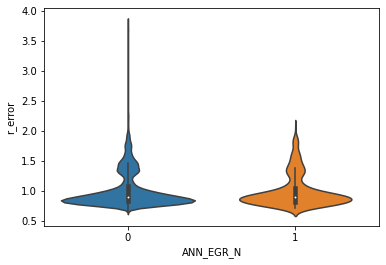

In [16]:
sns.violinplot(y=X['r_error'], x=y['ANN_EGR_N'], split=True)

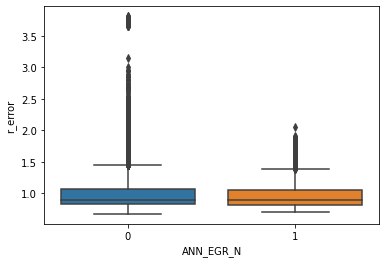

In [18]:
sns.boxplot(y=X['r_error'], x=y['ANN_EGR_N'])

In [22]:
df1 = pd.DataFrame()
df1['y']=y['ANN_EGR_N']
df1['x']=X['r_error']

In [33]:
print(
    df1[df1['y']==1]['x'].mean(),
    df1[df1['y']==1]['x'].max(),
    df1[df1['y']==1]['x'].min(),
    '\n',
    np.percentile(df1[df1['y']==1]['x'],25),
    np.percentile(df1[df1['y']==1]['x'],50),
    np.percentile(df1[df1['y']==1]['x'],75)
)

0.9954791860954834 2.0528212151475844 0.7075393541144546 
 0.8204287299393186 0.8994906235631069 1.0453607524428756


In [34]:
print(
    df1[df1['y']==0]['x'].mean(),
    df1[df1['y']==0]['x'].max(),
    df1[df1['y']==0]['x'].min(),
     '\n',
    np.percentile(df1[df1['y']==0]['x'],25),
    np.percentile(df1[df1['y']==0]['x'],50),
    np.percentile(df1[df1['y']==0]['x'],75)
)

1.0153768583525509 3.813107217828572 0.6703619185373261 
 0.8222943855992476 0.8980206624666476 1.075788000496635


In [36]:
df1[df1['y']==1]['x']

5708      0.873012
5709      0.953419
5710      0.899719
5711      0.910712
5712      0.908549
            ...   
109221    1.104114
109222    1.415030
109223    1.313391
109224    1.454350
109225    1.569050
Name: x, Length: 1265, dtype: float64

In [40]:
df2=df1[(df1['x']>=0.7075393541144546) & (df1['x']<=2.0528212151475844) ]

In [58]:
df2['dummy']=0

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


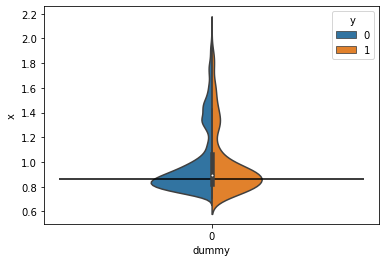

In [69]:
#sns.violinplot(y=df2['y'], x=df2['x'])
sns.violinplot(hue='y', y='x',data=df2, x='dummy', split=True)
plt.hlines(0.86,-1,1)